# Duke data get the cicular average

In [1]:
import skxray.core.roi as roi
import skxray.core.utils as core

import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

In [2]:
import fabio
def open_edf(img_num, ext, dir_path):

    img = fabio.open(dir_path+str(img_num)+ext)
    img_dat = img.data
    return img_dat

In [3]:

data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/"
ext = ".edf"
dark_img = 0

    
np.save("duke_dark.npy", dark_img/100)

duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data = np.asarray(duke_data)    

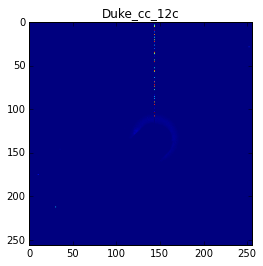

In [4]:
# Get the average image for all the image files
sum_img = np.average(duke_data, axis=0)

plt.imshow(sum_img)
plt.title("Duke_cc_12c")
plt.show()

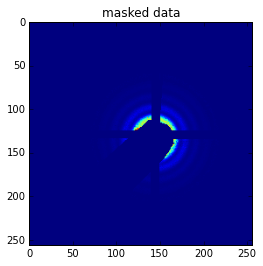

In [5]:
mask = ~np.load(data_dir+"Luxi_duke_mask.npy")
flat_field = np.load(data_dir+"Luxi_duke_flat.npy")

plt.imshow(mask*sum_img)
plt.title("masked data")
plt.show()

In [6]:
est_center=(144, 134)

inner_radius = 25
width=5
var=20
new_center = (149, 137)

#new_center = spe.suitable_center(sum_img, est_center, inner_radius, width, mask, var)


In [7]:
new_center

(149, 137)

In [8]:
def circular_average(image, calibrated_center, thershold=0,
                          nx=100, pixel_size=None):
    """
    Circular average of the intensity of the image SAXS(small angle
    x-ray scattering)

    Parameters
    ----------
    image : array
        input image

    calibrated_center : tuple
        The center in pixels-units (row, col)

    thershold : float, optional
        threshold value to mask

    nx : int, optional
        number of bins

    pixel_size : tuple, optionalsource dea
        The size of a pixel in real units. (height, width). (mm)

    Returns
    -------
    bin_centers : array
        bin centers from bin edges

    ring_averages : array
        circular integration of SAXS intensity
    """
    radial_val = core.radial_grid(calibrated_center, image.shape, pixel_size)

    bin_edges, sums, counts = core.bin_1D(np.ravel(radial_val),
                                          np.ravel(image), nx)
    th_mask = counts > thershold
    ring_average = sums[th_mask] / counts[th_mask]

    bin_centers = core.bin_edges_to_centers(bin_edges)

    return bin_centers, ring_average


# Get the circular average for the image data

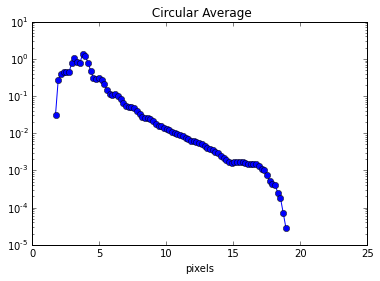

In [9]:
bin_cen, ring_avg = circular_average(sum_img*mask, new_center, thershold=0, nx=100, pixel_size=(0.1, 0.1))

plt.title(" Circular Average")
plt.semilogy(bin_cen,ring_avg, '-o')
plt.xlabel("pixels")
plt.show()

# Converte to Q space()

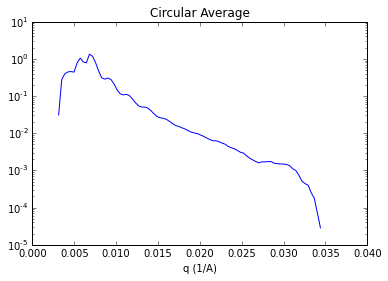

In [10]:
dist_sample = 2230

two_theta = core.radius_to_twotheta(dist_sample, bin_cen)


wavelength = 1.5498

q_val = core.twotheta_to_q(two_theta, wavelength)
plt.title("Circular Average")
plt.xlabel("q (1/A)")
plt.semilogy(q_val, ring_avg)
plt.show()